# Goals:
* matching different geospatial systems/crs across files using shapefiles

### Outputs:
* /data/tidy_data/ma_town_crs4326_coords.csv  - MA tows with centroid x/y points for modeling

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

In [2]:
death_data = pd.read_csv("../../data/tidy_data/ma_town_opioid_overdose_death_by_place_of_death_2012_to_2018_merge.csv")
opioid_pres_17 = pd.read_csv("../../data/tidy_data/medicare_partD_opioid_prescriber_2017_w_zip_MAtown_v1.csv")

In [3]:
census_zip_map = gpd.read_file("../../data/raw_data/tl_2019_us_zcta510/tl_2019_us_zcta510.shp")

In [4]:
census_zip_map.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.708733 41.327326, -83.708147 41...."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.086978 41.537796, -83.0825629999..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"(POLYGON ((-82.835577 41.710823, -82.83515 41...."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650299999999 41.253708, -83.48..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.222292 41.531025, -83.2222819999..."


In [5]:
opioid_pres_17.head()

,Unnamed: 0,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,town,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,year
0,0,1003002312,hopkins,patricia,2169,quincy,MA,rheumatology,4487,513.0,11.43,84.0,2017
1,1,1003083270,kabadi,mitesh,2169,quincy,MA,cardiology,1363,0.0,0.00,0.0,2017
2,2,1003291121,blair,meghan,2169,quincy,MA,nurse practitioner,905,0.0,0.00,0.0,2017
3,3,1003834433,nair,anil,2169,quincy,MA,neurology,1133,NaN,NaN,NaN,2017
4,4,1003992397,carolan,patricia,2169,quincy,MA,dentist,54,NaN,NaN,0.0,2017


In [6]:
opioid_pres_17['zip_code'] = opioid_pres_17['nppes_provider_zip_code'].astype(str).str.zfill(5)

In [7]:
census_zip_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 10 columns):
ZCTA5CE10     33144 non-null object
GEOID10       33144 non-null object
CLASSFP10     33144 non-null object
MTFCC10       33144 non-null object
FUNCSTAT10    33144 non-null object
ALAND10       33144 non-null int64
AWATER10      33144 non-null int64
INTPTLAT10    33144 non-null object
INTPTLON10    33144 non-null object
geometry      33144 non-null object
dtypes: int64(2), object(8)
memory usage: 2.5+ MB


In [8]:
# double check that the zipcodes in the prescriber data aren't census zip codes
print(len(set(opioid_pres_17['zip_code'])))
print(len(set(census_zip_map['ZCTA5CE10']) - set(census_zip_map['GEOID10'])))
print(len(set(opioid_pres_17['zip_code']) - set(census_zip_map['ZCTA5CE10'])))

448
0
22


In [9]:
set(opioid_pres_17['zip_code']) - set(census_zip_map['ZCTA5CE10'])

{'01061',
 '01102',
 '01144',
 '01202',
 '01477',
 '01614',
 '01655',
 '01805',
 '01842',
 '01853',
 '01910',
 '02051',
 '02117',
 '02185',
 '02211',
 '02238',
 '02241',
 '02325',
 '02334',
 '02345',
 '02541',
 '02722'}

In [10]:
opioid_pres_17[opioid_pres_17['zip_code'] == '02722']

,Unnamed: 0,npi,nppes_provider_last_name,nppes_provider_first_name,nppes_provider_zip_code,town,nppes_provider_state,specialty_description,total_claim_count,opioid_claim_count,opioid_prescribing_rate,long-acting_opioid_claim_count,year,zip_code
36871,36871,1225359052,zhao,qian,2722,fall river,MA,internal medicine,219,14.0,6.39,NaN,2017,02722
36872,36872,1417337908,goulart,jessica,2722,fall river,MA,nurse practitioner,404,15.0,3.71,0.0,2017,02722
36873,36873,1629277454,delgado,fabian,2722,fall river,MA,internal medicine,16958,193.0,1.14,16.0,2017,02722
36874,36874,1770906372,yadav,bijay,2722,fall river,MA,internal medicine,411,12.0,2.92,NaN,2017,02722
36875,36875,1932430592,dudha,majid,2722,fall river,MA,pulmonary disease,1776,NaN,NaN,0.0,2017,02722
36876,36876,1952829921,morrow,wendy,2722,fall river,MA,nurse practitioner,72,14.0,19.44,NaN,2017,02722


In [11]:
# census blocks map
census_blocks = gpd.read_file("../../data/raw_data/CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010BLOCKGROUPS_POLY.shp")

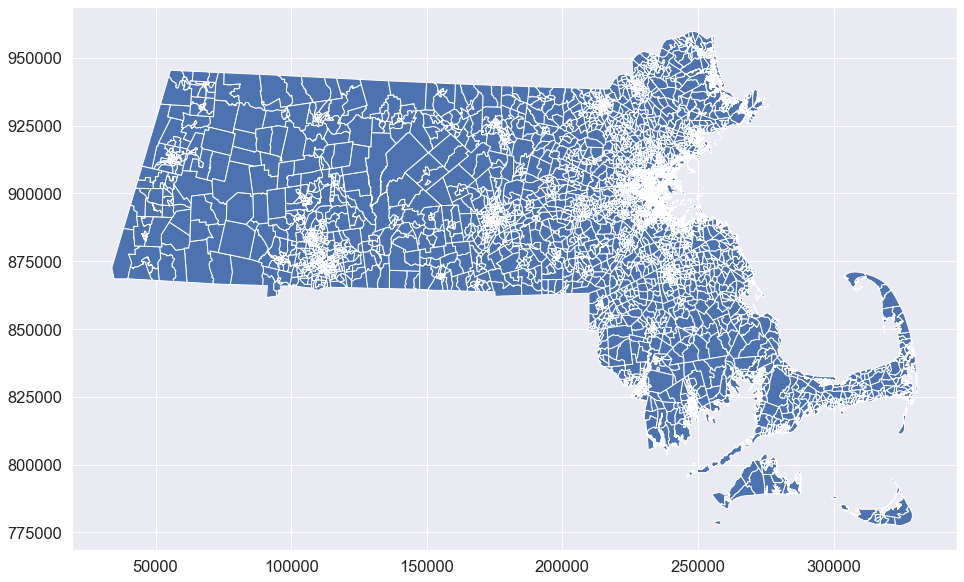

In [12]:
census_blocks.plot(figsize=(16,10))
plt.show()

In [13]:
census_blocks.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,"POLYGON ((245073.4579000026 857943.9572999999,..."
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,"POLYGON ((242521.254900001 859747.8350999989, ..."
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,"POLYGON ((244276.8404999971 862120.2314999998,..."
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,"POLYGON ((241369.4518999979 874137.570700001, ..."
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,"POLYGON ((240747.7463999987 873189.6048000008,..."


In [14]:
# does this denote state?
len(set(census_blocks['STATEFP10']))
# A: yes

1

In [15]:
points = census_blocks.copy()
# change geometry 
points['geometry'] = points['geometry'].centroid
points.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,POINT (243856.7307279073 858308.2978385694)
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,POINT (242004.2566174036 857829.7623223617)
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,POINT (244160.0989660571 861561.0733446195)
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,POINT (241130.6851021084 873574.4539211198)
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,POINT (240478.7043746133 873576.766094962)


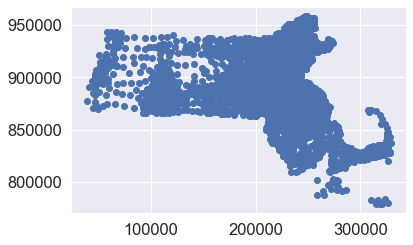

In [16]:
points.plot()

In [17]:
MA_town_map = gpd.read_file("../../data/raw_data/townssurvey_shp/TOWNSSURVEY_POLYM.shp")

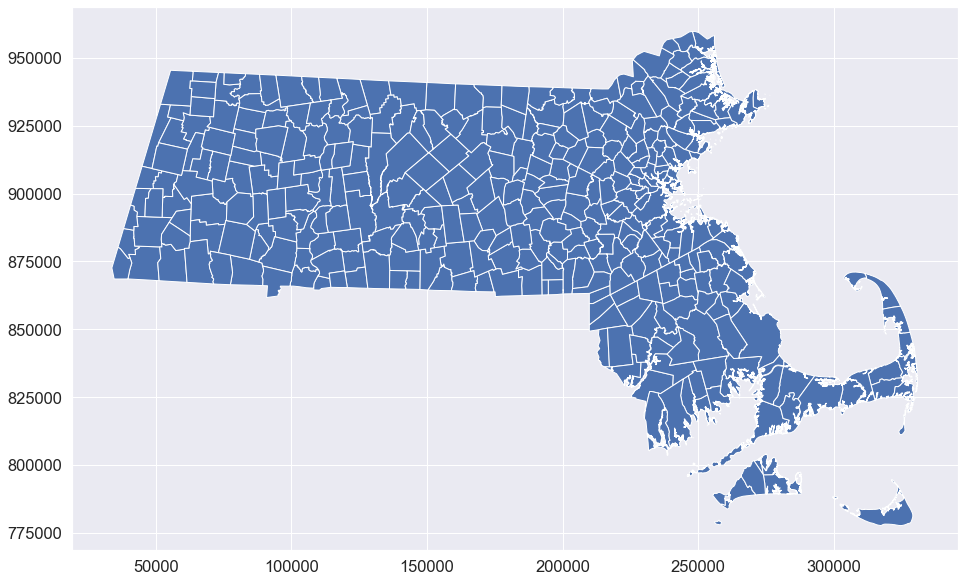

In [18]:
MA_town_map.plot(figsize=(16,10))

In [19]:
MA_town_map.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,SHAPE_Leng,SHAPE_Area,geometry
0,WELLESLEY,317,26658,26615,26604,-43,-11,T,2,25021,6749.852,10.547,27982,1378,26738.594369,2.726958e+07,"(POLYGON ((219129.012500003 897474.7045999989,..."
1,NEEDHAM,199,27310,27557,28924,247,1367,T,4,25021,8130.187,12.703,28886,-38,28960.012825,3.294777e+07,"POLYGON ((222991.1424999982 895149.4145999998,..."
2,PETERSHAM,234,997,1131,1180,134,49,T,3,25027,43675.599,68.243,1234,54,73405.706629,1.767489e+08,"POLYGON ((150592.6525000036 914968.5846000016,..."
3,READING,246,22545,22539,23708,-6,1169,T,3,25017,6393.727,9.990,24747,1039,23126.471303,2.587450e+07,"POLYGON ((232551.0625 923891.9946000017, 23344..."
4,QUINCY,243,83682,84985,88025,1303,3040,C,3,25021,11080.397,17.313,92271,4246,87188.934275,4.484078e+07,"(POLYGON ((242254.612499997 895020.5045999996,..."


In [20]:
death_data.head()

,city_death,2012,2013,2014,2015,2016,2017,2018
0,abington,1,2,0,6,1,3,5
1,acton,2,0,1,2,3,0,1
2,acushnet,2,0,0,4,2,4,0
3,adams,1,1,2,3,1,0,4
4,agawam,1,3,1,2,0,4,8


In [21]:
death_data.shape

(351, 8)

In [22]:
len(set(MA_town_map['TOWN']))

351

In [25]:
MA_town_map['TOWN'] = MA_town_map['TOWN'].str.lower()

In [26]:
print(set(MA_town_map['TOWN']) - set(death_data['city_death']))
print(set(death_data['city_death']) - set(MA_town_map['TOWN']))

{'north attleborough'}
{'north attleboro'}


In [27]:
death_data[death_data['city_death'] == 'north attleboro']

,city_death,2012,2013,2014,2015,2016,2017,2018
210,north attleboro,5,5,1,6,4,4,3


In [28]:
death_data['city_death'] = death_data['city_death'].replace('north attleboro', 'north attleborough')

In [29]:
print(set(MA_town_map['TOWN']) - set(death_data['city_death']))

set()


In [30]:
test_merge = MA_town_map.merge(death_data, how='left', left_on='TOWN', right_on='city_death')

In [31]:
print(len(set(test_merge['TOWN'])))
print(len(set(test_merge['city_death'])))
print(sum(test_merge['TOWN'] == test_merge['city_death']))

351
351
351


In [36]:
test_merge.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,SHAPE_Area,geometry,city_death,2012,2013,2014,2015,2016,2017,2018
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,2.726958e+07,"(POLYGON ((219129.012500003 897474.7045999989,...",wellesley,0,0,0,1,0,0,0
1,needham,199,27310,27557,28924,247,1367,T,4,25021,...,3.294777e+07,"POLYGON ((222991.1424999982 895149.4145999998,...",needham,0,0,0,1,2,1,0
2,petersham,234,997,1131,1180,134,49,T,3,25027,...,1.767489e+08,"POLYGON ((150592.6525000036 914968.5846000016,...",petersham,0,1,0,0,0,0,0
3,reading,246,22545,22539,23708,-6,1169,T,3,25017,...,2.587450e+07,"POLYGON ((232551.0625 923891.9946000017, 23344...",reading,1,1,2,2,4,4,1
4,quincy,243,83682,84985,88025,1303,3040,C,3,25021,...,4.484078e+07,"(POLYGON ((242254.612499997 895020.5045999996,...",quincy,23,26,39,43,36,37,35


In [38]:
# convert geometry to a more recognizable format
test_merge['geometry'] = test_merge['geometry'].to_crs(epsg=4326)
test_merge.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,SHAPE_Area,geometry,city_death,2012,2013,2014,2015,2016,2017,2018
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,2.726958e+07,(POLYGON ((-73.65216868877127 34.2447486528345...,wellesley,0,0,0,1,0,0,0
1,needham,199,27310,27557,28924,247,1367,T,4,25021,...,3.294777e+07,POLYGON ((-73.65216818021752 34.24474847551463...,needham,0,0,0,1,2,1,0
2,petersham,234,997,1131,1180,134,49,T,3,25027,...,1.767489e+08,POLYGON ((-73.65217768814524 34.24474985951341...,petersham,0,1,0,0,0,0,0
3,reading,246,22545,22539,23708,-6,1169,T,3,25017,...,2.587450e+07,POLYGON ((-73.65216698619614 34.24475080949321...,reading,1,1,2,2,4,4,1
4,quincy,243,83682,84985,88025,1303,3040,C,3,25021,...,4.484078e+07,(POLYGON ((-73.65216566762169 34.2447485106162...,quincy,23,26,39,43,36,37,35


In [39]:
ma_town_coord = pd.DataFrame({'town':test_merge['TOWN'].copy(), 'x': test_merge.centroid.x, 'y': test_merge.centroid.y})
ma_town_coord.head()

,town,x,y
0,wellesley,-73.652169,34.244748
1,needham,-73.652168,34.244748
2,petersham,-73.652179,34.244750
3,reading,-73.652167,34.244751
4,quincy,-73.652166,34.244748


In [40]:
# ma_town_coord.to_csv("../../data/tidy_data/ma_town_crs4326_coords.csv", index=False)

In [ ]:
type(test_merge)

In [ ]:
print(test_merge.crs)
print(census_blocks.crs)

In [ ]:
test4 = gpd.sjoin(test_merge, census_blocks, how='left', op='contains')

In [ ]:
cent_join = gpd.sjoin(test_merge, points, how='left', op='contains')

In [ ]:
cent_join.head()

In [ ]:
cent_join.shape

In [ ]:
census_blocks.shape

In [ ]:
cent_join.head()

In [ ]:
cent_join_sub = cent_join[['TOWN', 'POP2010', 'SHAPE_Area', 'GEOID10', 'SHAPE_AREA', 'POP100_RE']].copy()

In [ ]:
cent_join_sub.head()

In [ ]:
cent_join_block_sum = cent_join_sub.groupby('TOWN').sum()[['POP100_RE']].reset_index()

In [ ]:
cent_join_block_sum.head()

In [ ]:
cent_join_block_sum.shape

In [ ]:
cent_join_sum_to_exp = cent_join_sub[['TOWN', 'POP2010']].drop_duplicates().merge(cent_join_block_sum, on='TOWN', how='inner')

In [ ]:
display(cent_join_sum_to_exp.head())
sns.regplot(x='POP2010', y='POP100_RE', data=cent_join_sum_to_exp)

In [ ]:
cent_join_sum_to_exp['error'] = (abs(cent_join_sum_to_exp['POP100_RE'] - cent_join_sum_to_exp['POP2010']) * 100) / cent_join_sum_to_exp['POP2010']

In [ ]:
cent_join_sum_to_exp.head()

In [ ]:
cent_join_sum_to_exp.sort_values('error', ascending=False)

In [ ]:
cent_join_sum_to_exp['error'].hist(bins=100)

In [ ]:
cent_join_sum_to_exp[cent_join_sum_to_exp['error'] > 20].shape

In [ ]:
cent_join_sum_to_exp[cent_join_sum_to_exp['error'] > 20]

In [ ]:
cent_join_sub.head()

In [ ]:
cent_join_sub.to_csv("../")

In [ ]:
test4.head()

In [ ]:
test4.shape

In [ ]:
test4.columns

In [ ]:
len(set(census_blocks['GEOID10']))

In [ ]:
test4['GEOID10'].value_counts().reset_index().sort_values('GEOID10', ascending=False)

In [ ]:
test4.head()

In [ ]:
test4.columns

In [ ]:
test4[['TOWN', 'POP2010', 'SHAPE_Area', 'GEOID10', 'SHAPE_AREA']]

In [ ]:
test2.head()

In [ ]:
test4.columns

In [ ]:
test_merge.columns

In [ ]:
test2.columns

In [ ]:
test4.shape

In [ ]:
test4['GEOID10'].value_counts().hist()

In [ ]:
print(len(set(census_blocks['GEOID10'])))
print(len(census_blocks['GEOID10']))

In [ ]:
block_count = test4['GEOID10'].value_counts().reset_index()

In [ ]:
block_count[block_count['GEOID10'] != 1]

In [ ]:
test5 = gpd.sjoin(test_merge, census_blocks, how='left', op='contains')

In [ ]:
test5.shape

In [ ]:
test5.head()

In [ ]:
test5.plot(cmap=None)

In [ ]:
postal_zip_map = gpd.read_file("../raw_data/zipcodes_nt/ZIPCODES_NT_POLY.shp")

In [ ]:
postal_zip_map.head()

In [ ]:
postal_zip_map.shape

In [ ]:
len(set(postal_zip_map['CITY_TOWN']))

In [ ]:
census_zip_map.head()

In [ ]:
len(set(census_zip_map['GEOID10']))

In [ ]:
set(census_zip_map['ZCTA5CE10'])

In [ ]:
census_zip_map[census_zip_map['ZCTA5CE10'].isin(set(postal_zip_map['POSTCODE']))].plot(figsize=(16,10))